## Importing the relevant packages


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [18]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/1.%20Introduccion%20a%20las%20series%20temporales/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')# b= dias lasborables
df_comp=df_comp.fillna(method='ffill') # ffill datos faltantes

In [19]:
df_comp['market_value']=df_comp.ftse #ftse

In [20]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

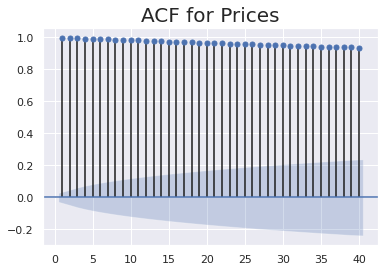

In [21]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()
# todos los valores de correlacion retrasados son signficativos y estan disminuyendo, pero  muy lentamente

## The PACF

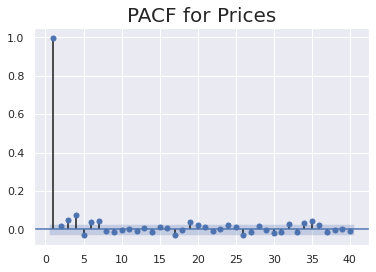

In [22]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()
# se pueden encontrar coeficientes que son no significativos, solo considerando los efectos directos.
# A partir del retraso 25 no son significativos ya que los coeficientes son muy cercanos a cero

## The AR(1) Model

In [23]:
model_ar = ARMA(df.market_value, order=(1,0)) # funcion ARMA.. order=(1,0) 1 respresenta el numero de valores pasados que deseamos incorporar en el modelo 
# y el 0 de que no estamos teniendo encuenta ninguno de los valores residuales

In [24]:
results_ar = model_ar.fit()

In [25]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.599
Method:                       css-mle   S.D. of innovations             59.258
Date:                Mon, 17 Jan 2022   AIC                          55251.198
Time:                        12:42:02   BIC                          55270.762
Sample:                    01-07-1994   HQIC                         55258.054
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5067.4707    486.503     10.416      0.000    4113.942    6021.000
ar.L1.market_value     0.9985      0.001   1298.545      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

ar.L1.market_value	
-> .market_value es la viarible
-> .L1 es el retraso 1
-> ar indica que es de un modelo autoregresivo


coef -- entrega el valor de los coeficientes del modelo (const (consttante) y parametro del primer retraso en este caso)

std err	 -- entrega los errores estandar para cada coeficiente

z -- valor del estadistico de prueba asociado para determinar la signiciacion de cada una de la estimaciones (coeficientes) 

P>|z| -- P-valor  -- se quiere que sea muy pequeno yg se compara con el nivel de significancia

[0.025	0.975] -- intervalo de confinaza -- si este intervalo de confinaza contiene al 0, es equivalente a no rechazar la hipotesis nula y si no no contiene el 0, decimos que es distinto de cero el coeficiente por lo cual es coeficiente es significativo. POr ejemplo el intervalo 0.997	1.000 no contine el o por lo cual el coeficiente 0.9985 es significativo



## Higher-Lag AR Models

In [26]:
model_ar_2 = ARMA(df.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.866
Method:                       css-mle   S.D. of innovations             59.249
Date:                Mon, 17 Jan 2022   AIC                          55251.732
Time:                        12:42:07   BIC                          55277.817
Sample:                    01-07-1994   HQIC                         55260.872
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5028.8087    495.980     10.139      0.000    4056.706    6000.911
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4562           +0.0000j           58.4562            0.5000
-----------------------------------------------------------------------------
"""

el P-valor de 0.226 es > a 0.05 por lo cual se puede rechazar la hipotesis nula del contraste que se hace sobre este parametro, es decir, sugiere que el coeficiete para el segundo retraso no es significativamente diferente de cero por lo cual se puede suponer que es igual a cero

In [27]:
model_ar_3 = ARMA(df.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Mon, 17 Jan 2022   AIC                          55241.742
Time:                        12:42:09   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    520.345      9.781      0.000    4069.784    6109.499
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [28]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.569
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 17 Jan 2022   AIC                          55217.138
Time:                        12:42:13   BIC                          55256.266
Sample:                    01-07-1994   HQIC                         55230.849
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5107.1947    562.142      9.085      0.000    4005.417    6208.972
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9549           -2.0884j            2.2964           -0.1817
AR.3            0.9549           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

Log Likelihood: probabilidad del algoritmo de la verosimilitud -- mientras mas complejidad le vamos aumentando al modelo, mas aumenta el logoritmo de la verosimilitud.

AIC -- se buscan valores mas bajos
BIC -- se buscan valores mas bajos

contraste de razon de log de verosimilitud (LLR): sirve para determiniar si los dos modelo son significativamente diferentes. Para poderse implementar se debe cumplir lo siguiente:
* deben ser dos modelos (no mas)
* Este test devuelve un p valor para poder ver si rechazamos la hipotesis nula o no.

Ho: los dos modelo son signifivativamente iguales (similares)
Ha: los dos modelo son signifivativamente diferentes

## LLR Test

In [29]:
def LLR_test(mod_1, mod_2, DF=1): # DF=1 son los grados de libertad del estadistico, es igual a uno, ya que esa es la diferencia entre los coeficientes de cada modelo
    L1 = mod_1.llf #  llf para hayar la log verosimilitud
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3) # p-valor
    return p

## Comparing Higher-Lag AR Models

In [32]:
LLR_test(results_ar_2, results_ar_3) # 0.001 < 0.005 como se rechaza la hipotesis nula, entonce me quedo con el modelo 3

0.001

In [31]:
LLR_test(results_ar_3, results_ar_4) # 0.0 < 0.005 como se rechaza la hipotesis nula, entonce me quedo con el modelo 4

0.0

In [33]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.569
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 17 Jan 2022   AIC                          55217.138
Time:                        12:45:34   BIC                          55256.266
Sample:                    01-07-1994   HQIC                         55230.849
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5107.1947    562.142      9.085      0.000    4005.417    6208.972
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [34]:
model_ar_5 = ARMA(df.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_4, results_ar_5)))
# ojo que siempre debo mirqar si el ultimo coeficiente es significativo o no para proceder con el test LLR

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Mon, 17 Jan 2022   AIC                          55214.697
Time:                        12:45:46   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    543.596      9.363      0.000    4024.213    6155.070
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [35]:
model_ar_6 = ARMA(df.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_5, results_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Mon, 17 Jan 2022   AIC                          55208.947
Time:                        12:47:10   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    565.172      9.005      0.000    3981.925    6197.357
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [36]:
model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_6, results_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Mon, 17 Jan 2022   AIC                          55201.799
Time:                        12:47:24   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    589.587      8.633      0.000    3934.072    6245.210
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [38]:
model_ar_8 = ARMA(df.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_7, results_ar_8)))

# el coeficiente no es significativo ya que el valor p es 0.571 y este es > a 0.05. Entonces no podemos tener un retraso a nivel 8
# o de 8 dias atras ... ademas si vemos el p-valor donde se comparar los dos modelos tambien se rechaza la hipotesis nula.
# luego nos quedamos con el modelo 7

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Mon, 17 Jan 2022   AIC                          55203.478
Time:                        12:50:02   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    584.948      8.701      0.000    3943.165    6236.118
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [41]:
print("LLR test: " + str(LLR_test(results_ar, results_ar_7, DF = 6)))
# se esta comparando el  modelo simple con el de 7 retrasos para verificar si en efecto tener un modelo mas complejo si mejora las preducciones
# en este caso la LLR se tiene que 0.0 < 0.005 por lo cual los resultado son significativos

# Sin embargo el modelo tiene coeficientes que no son significativos los que es un problema. 
# LOS MODELOS AUTOREGRESIVOS MODELAN MEJOR LAS SERIES DE TIEMPO QUE SON ESTACIONARIAS Y FUNCIONAN PEOR PARA SERIES QUE SON NO ESTACIONARIAS
# estos datos son no estacionarios (se puede comprobar con la prueba Dickey - Fuller) siembargo los datos se pueden transformar para que cumplan la estacionalidad

LLR test: 0.0


## Analysing the Residuals

In [43]:
df['res_price'] = results_ar_7.resid # se estan guardando los residuos del modelo en una variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
sts.adfuller(df.res_price)
# p-valor: 0.0, luego se rechaza la hipotesis de que no son estacionarios, es decir son estacionarios

(-76.07469620991299,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 54842.41512231188)

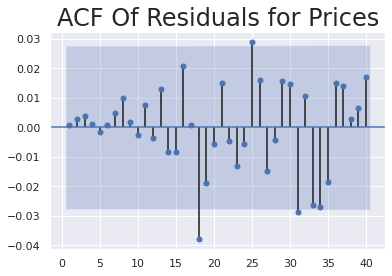

In [ ]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()
# para mirar si se tiene autocorrelacion se grafica... la mayoria caen dentro del area auzl, por lo cual no son significativamente diferentes de cero,es decir son significativamente 
# diferentes de cero, es decir no hay autocorrelacion

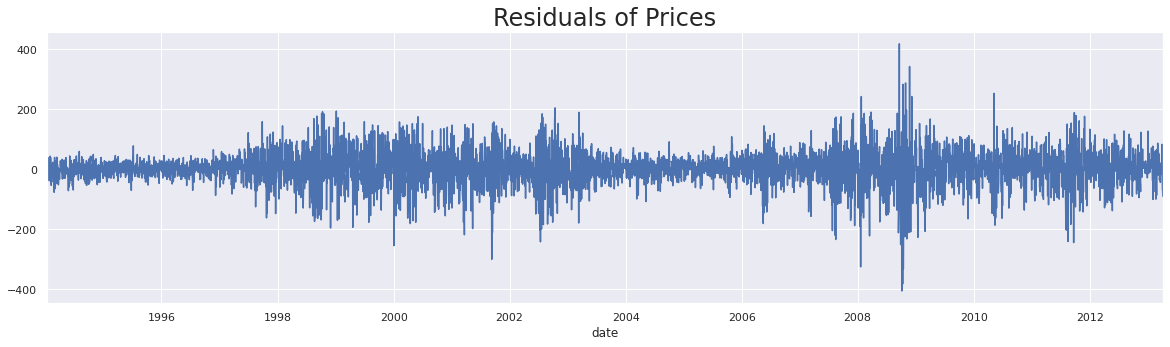

In [46]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show() # se asemeja a la grafica del ruido blanco, es deci rno hay ningun patron